In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from osgeo import gdal
import numpy as np

import matplotlib.pyplot as plt

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 

# Tutorial 1

[Link](https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/)

## Load data

In [2]:
!eio clip -o Shasta-30m-DEM.tif --bounds -122.6 41.15 -121.9 41.6 

'make' is not recognized as an internal or external command,
operable program or batch file.
Traceback (most recent call last):
  File "C:\Users\lisa.hornung\anaconda3\envs\py3_map2\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\lisa.hornung\anaconda3\envs\py3_map2\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\lisa.hornung\anaconda3\envs\py3_map2\Scripts\eio.exe\__main__.py", line 7, in <module>
  File "C:\Users\lisa.hornung\anaconda3\envs\py3_map2\lib\site-packages\click\core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "C:\Users\lisa.hornung\anaconda3\envs\py3_map2\lib\site-packages\click\core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "C:\Users\lisa.hornung\anaconda3\envs\py3_map2\lib\site-packages\click\core.py", line 1688, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "C:\Users\lisa.hornung\anaconda3\envs\py3_

In [4]:
filename = "30n000e_20101117_gmted_mea150.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

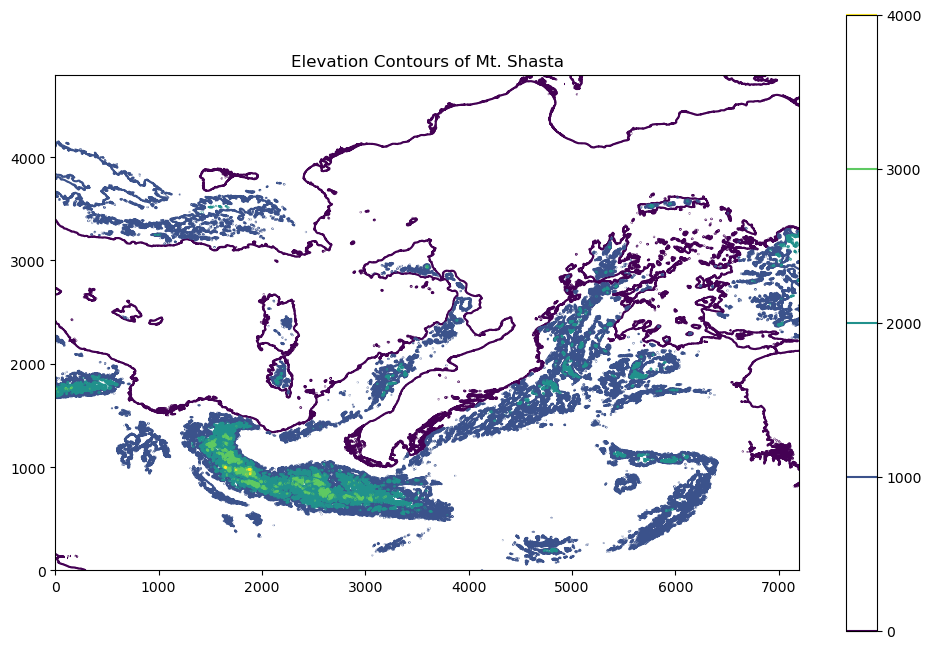

In [8]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 1000)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# Load data
DEM data via USGS Earth Explorer

[This tutorial](https://github.com/wboykinm/maptember/blob/main/2023/maptember_2023.ipynb) for extracting contour data

In [1]:
import geopandas as gpd

In [3]:
!gdal_contour -a elev "30n000e_20101117_gmted_mea150.tif" "contour.geojson" -i 1.0

: 

In [ ]:
# Get the contours
dem = gpd.read_file("contour.geojson")

In [ ]:
# Clip the "wheeler_dem" GeoDataFrame with the buffer geometry
#clipped_wheeler_dem = gpd.clip(data_array, buffer_geometry)

dem.plot(
    aspect=1,
    linewidth=0.15,
    column='elev',
    cmap='PuOr',
    figsize=[6,6]
).set_axis_off()

In [ ]:
# Set a reasonable point
point_coords = [(48.88679852821706, 2.3430741678042164)]
point_geometry = [Point(lon, lat) for lat, lon in point_coords]
point_gdf = gpd.GeoDataFrame(geometry=point_geometry, crs='EPSG:4326')

# Reproject to a metric CRS (assuming you're working with a geographic CRS)
point_gdf = point_gdf.to_crs('EPSG:6589')

# Create a buffer around the point with a 1000-meter radius
buffer_radius = 400  # in meters
buffer_geometry = point_gdf.buffer(buffer_radius)

In [ ]:


from shapely.geometry import Point

# Get the contours from above
wheeler_dem = gpd.read_file("./data/wheeler_contour.geojson")

# Set a reasonable point
point_coords = [(44.733907964804885, -72.09071643657519)]
point_geometry = [Point(lon, lat) for lat, lon in point_coords]
point_gdf = gpd.GeoDataFrame(geometry=point_geometry, crs='EPSG:4326')

# Reproject to a metric CRS (assuming you're working with a geographic CRS)
point_gdf = point_gdf.to_crs('EPSG:6589')

# Create a buffer around the point with a 1000-meter radius
buffer_radius = 400  # in meters
buffer_geometry = point_gdf.buffer(buffer_radius)

# Clip the "wheeler_dem" GeoDataFrame with the buffer geometry
clipped_wheeler_dem = gpd.clip(wheeler_dem, buffer_geometry)

clipped_wheeler_dem.plot(
    aspect=1,
    linewidth=0.15,
    column='elev',
    cmap='PuOr',
    figsize=[6,6]
).set_axis_off()

